# Frequency of 20th terms for menstruation using NGRAMS -  Times Digital Archive


The key here is to have a look at what we are getting with the track of each individual series - by plotting  the mention of each term over time - giving them each individual term a line in the graph. So we can see if the use of terms changes over time


For getting the counts of each term  we have run the following defoe's queries:

* spark-submit --py-files defoe.zip defoe/run_query.py tda_data_total.txt papers defoe.papers.queries.keysearch_by_year queries/menstrual.yml -r results_menstruation_total -n 324 

The results of are stored in this gitHub, inside the folder called results_TDA.

Futhermore, we also needed to run the normalised query, to know how many issues, articles and words we have per year. 

*  spark-submit --py-files defoe.zip defoe/run_query.py tda_data_total.txt nls defoe.papers.queries.normalize -r results_norm_tda -n 324


Note: tda_data_total.txt contains the path of the TDA dataset from 20th and 21th century (years from 19001 to 1994 and 2010:

    /xxx/TDA_GDA_1785-2009/1900/19000101/0FFO-1900-JAN01.xml
    /xxx/TDA_GDA_1785-2009/1900/19000102/0FFO-1900-JAN02.xml
    /xxx/TDA_GDA_1785-2009/1900/19000103/0FFO-1900-JAN03.xml
    /xxx/TDA_XMLS/20101228/0FFO-2010-1228.xml
    /xxx/TDA_XMLS/20101229/0FFO-2010-1229.xml
    /xxx/TDA_XMLS/20101230/0FFO-2010-1230.xml
    /xxx/TDA_XMLS/20101231/0FFO-2010-1231.xml

### Loading the necessary libraries

In [300]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections

### Functions

In [301]:
def freq_count(results):
    freq_count={}
    for year in results:
        for i in results[year]:
            if i[0] not in freq_count:
                freq_count[i[0]]={}
                freq_count[i[0]][year]=i[1]
                
            else:
                if year not in freq_count[i[0]]:
                    freq_count[i[0]][year]=i[1]
                else:    
                    freq_count[i[0]][year]+=i[1]
    return freq_count

In [302]:
def normalize_freq(publication, freq_results, view_terms):
    plt.figure(figsize=(20,8))
    years=set()
    for term in view_terms:
        if term in freq_results:
            normed_results = {}
            for year in freq_results[term]:
                if year>0:
                    normed_results[year] = (freq_results[term][year]* len(term.split()))/float(publication[year][2])
                    years.add(year)
            plt.plot(*zip(*sorted(normed_results.items())), label=term, lw = 2, alpha = 1, marker="X")
    x_years=sorted(list(years))
    plt.xticks(np.arange(min(x_years), max(x_years)+1, 2.0), rotation=45) 
    plt.ticklabel_format(style = 'plain')
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(loc='upper right')
    plt.xlabel("Years")
    plt.ylabel("Normalized Frequency")
    plt.show()       

In [303]:
def read_query_results(filename):
    with open('./results_TDA/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [304]:
def plot_freq_count(freq_results, view_terms):
    plt.figure(figsize=(20,8))
    years=set()
    for term in view_terms:
        if term in freq_results:
            plt.plot(*zip(*sorted(freq_results[term].items())), label=term, lw = 2, alpha = 1, marker="X")
            for y in freq_results[term].keys(): 
                years.add(y)     
    x_years=sorted(list(years))
    plt.xticks(np.arange(min(x_years), max(x_years)+1, 2.0), rotation=45) 
    plt.ticklabel_format(style = 'plain')
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(loc='upper right')
    plt.ylabel('Frequency')
    plt.xlabel("Years")
    plt.show()

In [305]:
def plot_norm(publication, element):
    plt.figure(figsize=(20,8))
    num_element={}
    years=set()
    for year in publication:
        if element == "words":
            num_element[year]=publication[year][2]
        elif element == "articles":
            num_element[year]=publication[year][1]
        else:
            num_element[year]=publication[year][0]
        years.add(year)  
    plt.plot(*zip(*sorted(num_element.items())), label=element, lw = 2, alpha = 1, marker="X")
    x_years=sorted(list(years))
    plt.xticks(np.arange(min(x_years), max(x_years)+1, 2.0), rotation=45) 
    plt.ticklabel_format(style = 'plain')
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(loc='upper right')
    plt.ylabel('Number of ' + element + 'per volumne')
    plt.xlabel("Years")

    plt.show()
    return num_element, years

## 1. Normalised Query

First we examine the total number of issues, articles and words published over the period to see how much our search terms are affected by the way that published increases over the measurement period.

The query return the results in this format:

    {
      <YEAR>: [<NUM_ISSUES>, <NUM_ARTICLES>, <NUM_WORDS>],
      ...
    }

In [306]:
norm_publication=read_query_results('results_norm_tda_20th')

#for printing the values, we are going to sort the values 
# by the years and just visualizing the first 10 years . 
#e.g --> First: 1900 year, with 313 issues, 47169 articles, and 46232765 words. 
#e.g --> Last: 1901 year, with 313 issues , 32443 articles and 45044476 words.

sorted(norm_publication.items())[:10]

[(1900, [313, 47169, 46232765]),
 (1901, [313, 32443, 45044476]),
 (1902, [313, 32350, 44745558]),
 (1903, [313, 33300, 42351412]),
 (1904, [313, 32939, 42522060]),
 (1905, [312, 31246, 40855773]),
 (1906, [313, 34889, 42331368]),
 (1907, [313, 36415, 44760742]),
 (1908, [314, 43622, 49866241]),
 (1909, [313, 50664, 47828117])]

In order to set the scene and visualize how the issues, articles and words grew over the time, we are going to plot three basic graphs:        
- number of issues over time per year
- number of articles over time per year
- number of words over time per year
      

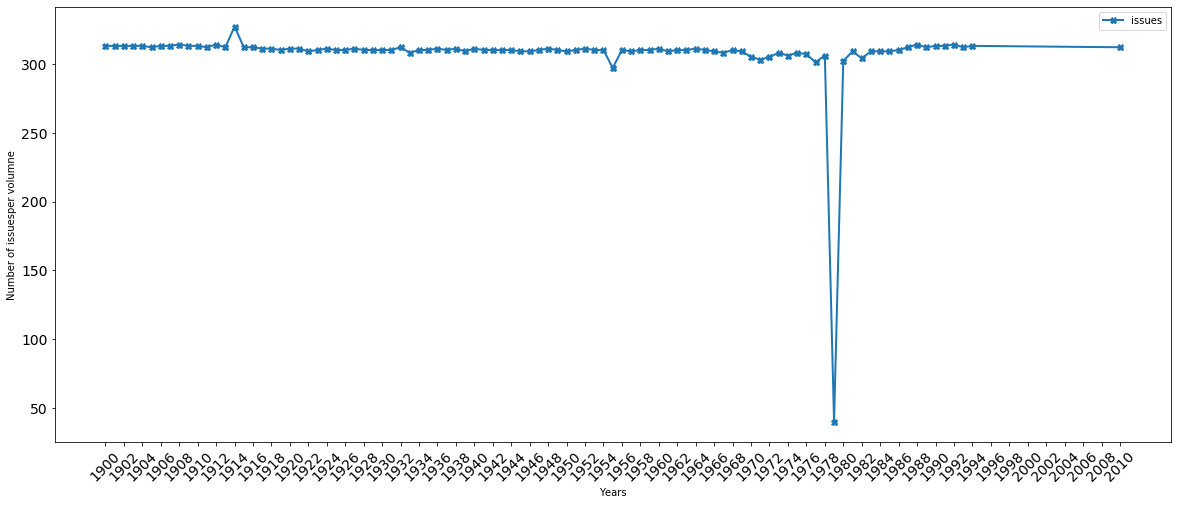

In [307]:
#Plot the variation of number of issues
num_issues, issues_years = plot_norm(norm_publication, "issues")


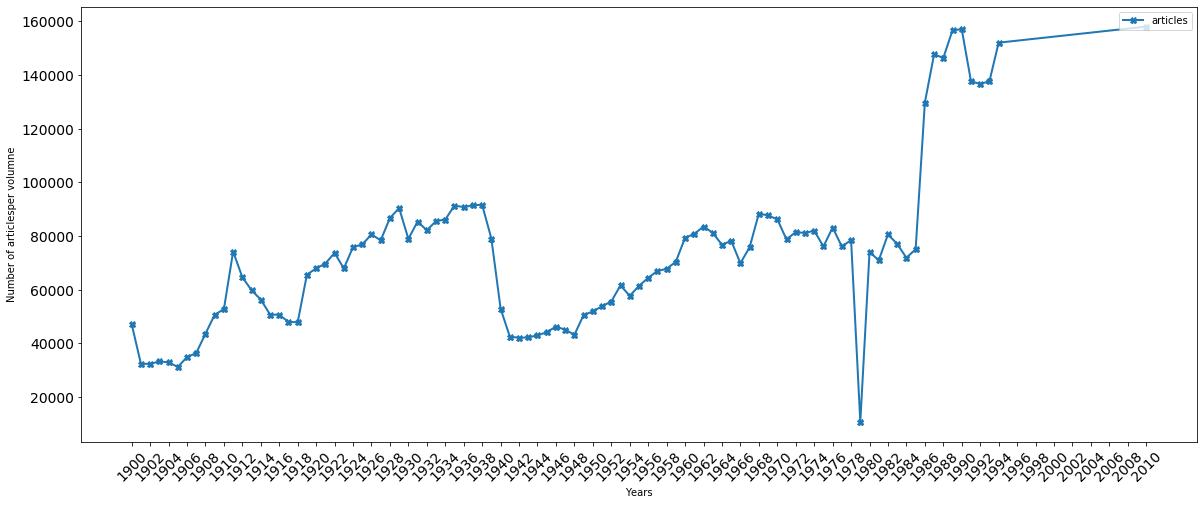

In [308]:
#Plot the variation of number of articles
num_articles, articles_years = plot_norm(norm_publication, "articles")

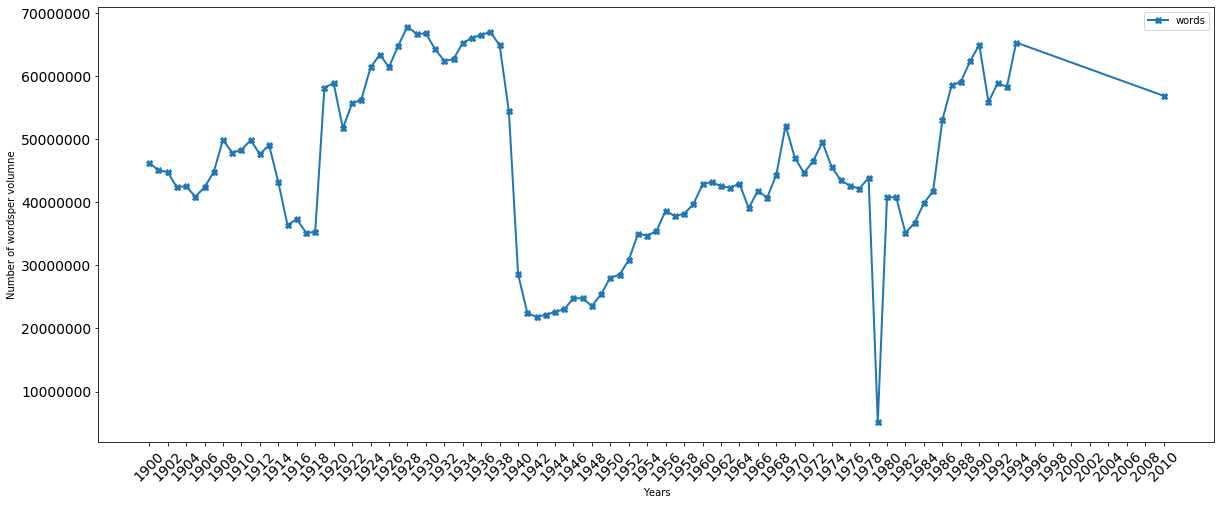

In [309]:
#Plot the variation of number of words 
num_words, words_years = plot_norm(norm_publication, "words")

## 2. Distribution of terms over time

We count the total number of words per year, and then count total instances of each query's search terms in it. 

Finally, we **plot normalised frequency** (by words) on a graph (x axis is years), to see whether a term is becoming more or less popular with time. 

All the words (query's search terms and TDA words) have been normalized (lower case, and remove everything that is not a letter) and lemmatized (reduces the word-forms to linguistically valid lemmas). 

**Query search terms** : 
    - 'catamenial', 'menstrual', 'menstruation', 'monthly periods', 'periodic bleeding', 'tampax', 'kotex', 'tambrands', 'tampon', 'Sanitary bin', 'sanitary pad', 'tassaway', 'tassette', 'the curse', 'tss', 'toxic shock syndrome', 'menopause', 'dysmenorrhea', 'amenorrhea', 'pms', 'pre menstrual syndrome', 'premenstrual syndrome', 'katharina dalton', 'playtex', 'rely', 'syngyna', 'bodyform', 'essity'. 
    
**Note**: Since we have a high number of search terms, we have divided them in **5 taxonomies**, in order to improve visualizations.

#### Terms used (taxomomy_1): 'catamenial', 'menstrual', 'menstruation', 'monthly periods', 'periodic bleeding'

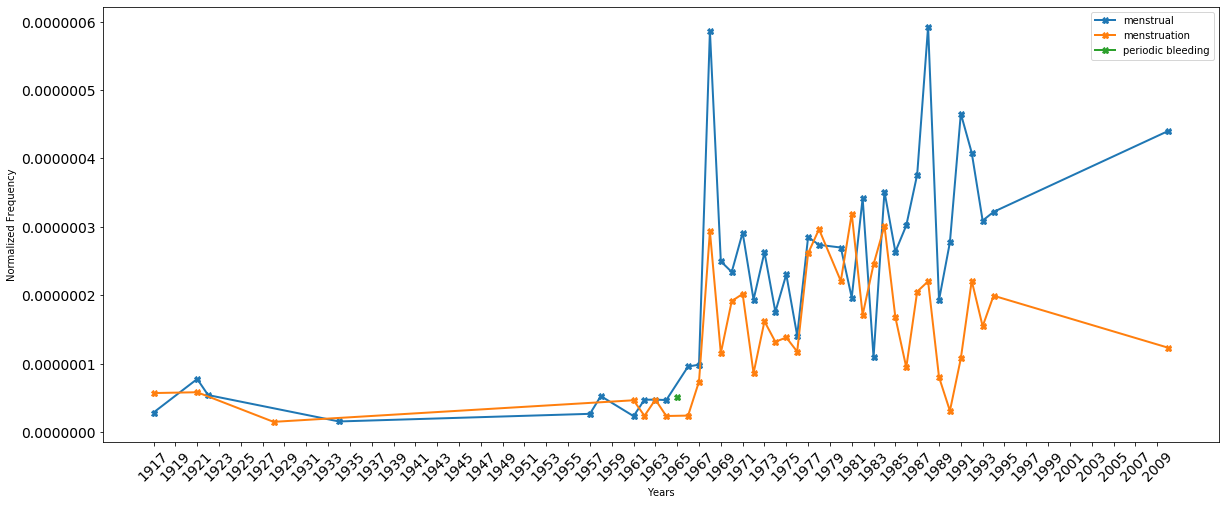

In [310]:
taxonomy_1= ['catamenial', 'menstrual', 'menstruation', 'monthly periods', 'periodic bleeding']
query_results=read_query_results('results_menstruation_total_20th')

freq_count_lem=freq_count(query_results)
normalize_freq(norm_publication, freq_count_lem, taxonomy_1)

####  Without normalising - Visualising the raw frequencies  of taxonomy 1

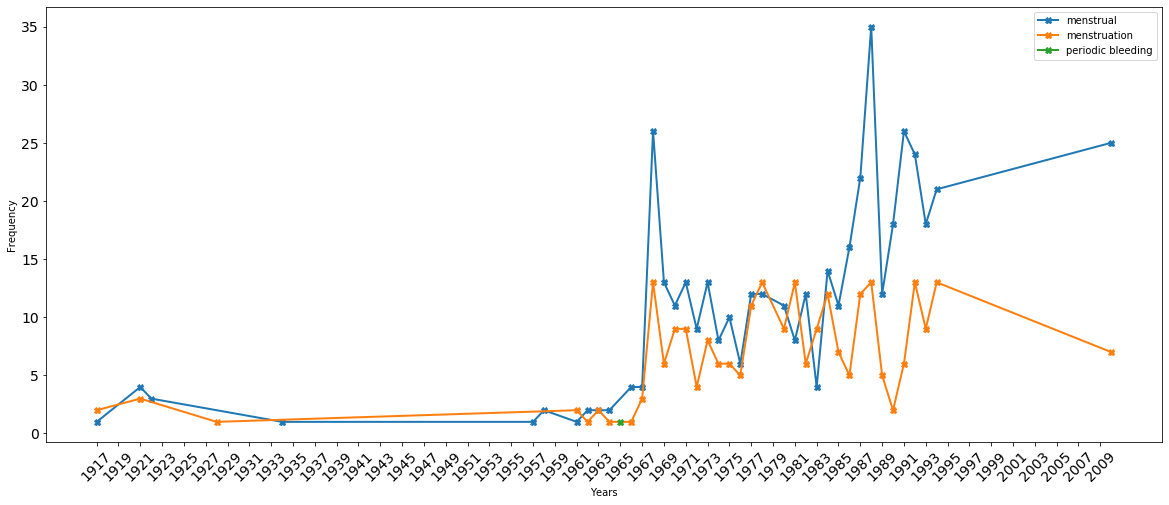

In [311]:
plot_freq_count(freq_count_lem, taxonomy_1)

In [312]:
# Exploring menstruation
#sorted(freq_count_lem['menstruation'].items())

#### Terms used (taxomomy_2): 'tampax', 'kotex', 'tambrands', 'tampon', 'sanitary bin', 'sanitary pad'

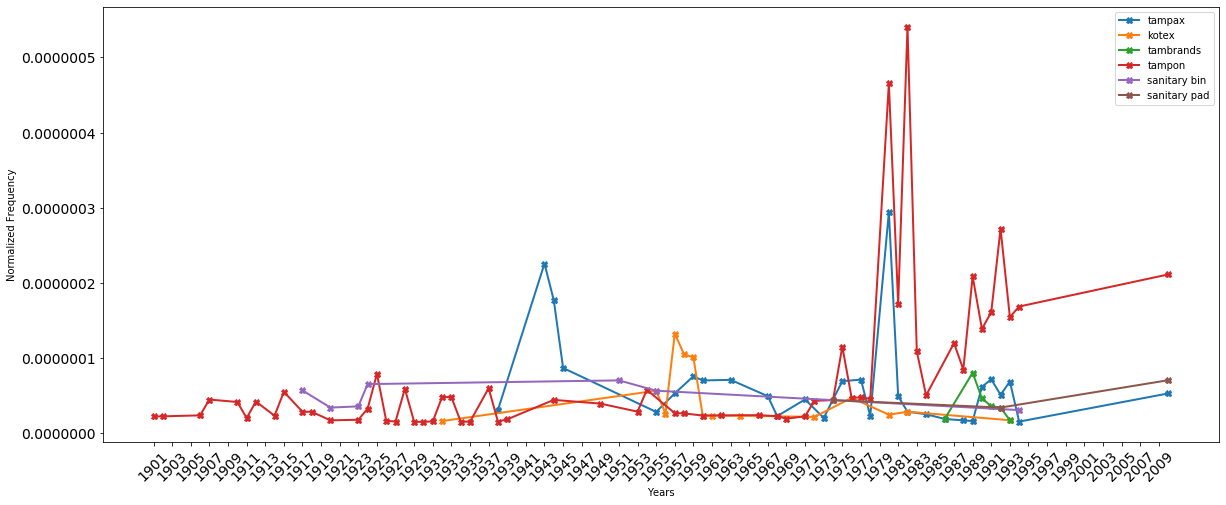

In [313]:
taxonomy_2=['tampax', 'kotex', 'tambrands', 'tampon', 'sanitary bin', 'sanitary pad']
query_results=read_query_results('results_menstruation_total_20th')

freq_count_lem=freq_count(query_results)
normalize_freq(norm_publication, freq_count_lem, taxonomy_2)

#### Without normalising - Visualising the raw frequencies of taxonomy 2

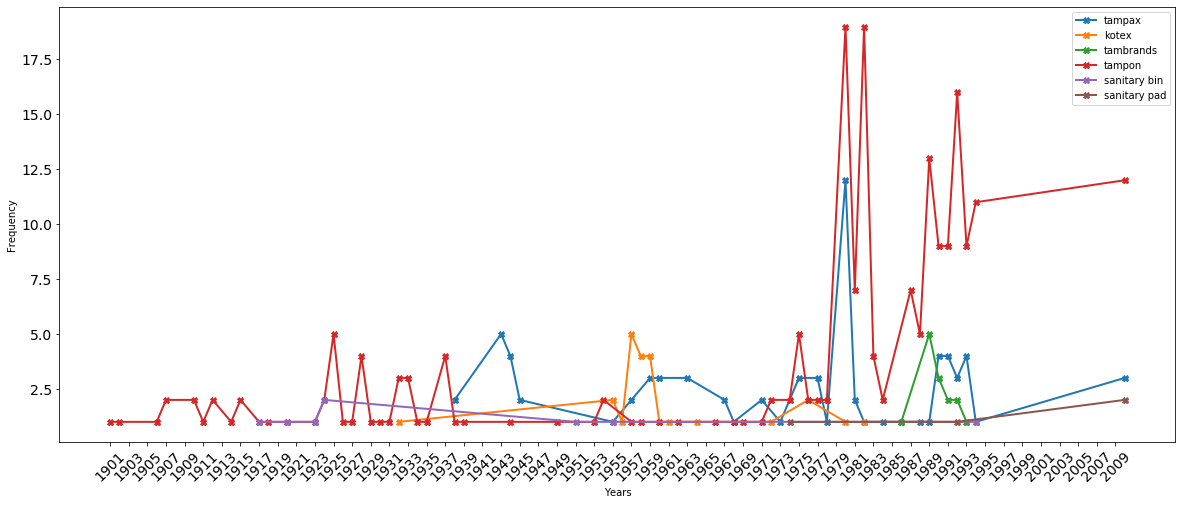

In [314]:
plot_freq_count(freq_count_lem, taxonomy_2)

#### Terms used (taxomomy_3): 'tassaway', 'tassette', 'the curse', 'tss', 'toxic shock syndrome'

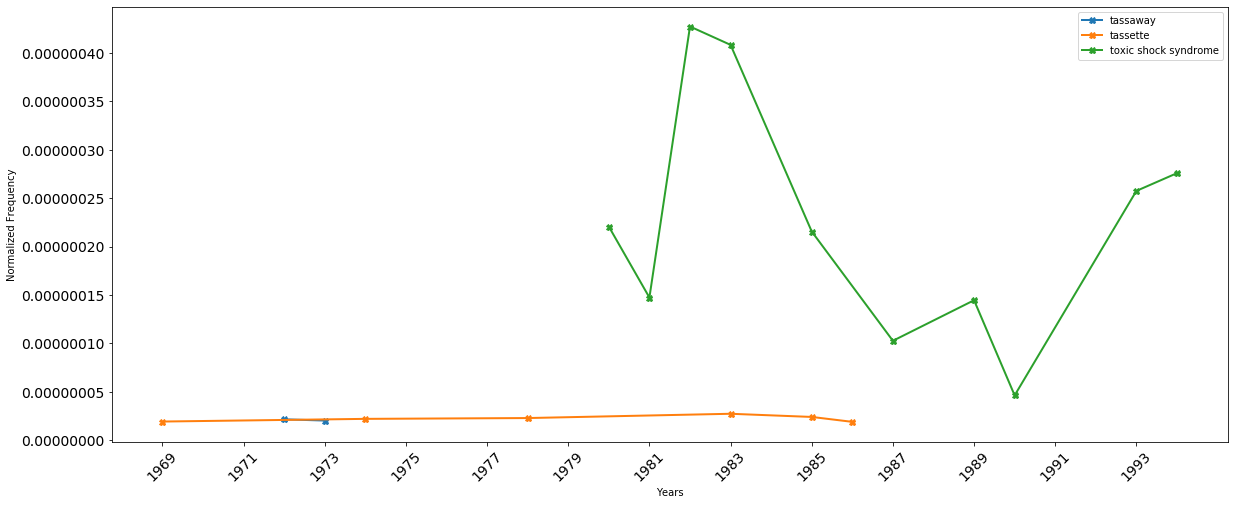

In [315]:
#taxonomy_3 = ['tassaway', 'tassette', 'the curse', 'tss', 'toxic shock syndrome']
# I have removed: the curse and tss
taxonomy_3 = ['tassaway', 'tassette', 'toxic shock syndrome']
query_results=read_query_results('results_menstruation_total_20th')

freq_count_lem=freq_count(query_results)
normalize_freq(norm_publication, freq_count_lem, taxonomy_3)

#### Without normalising - Visualising the raw frequencies of taxonomy 3

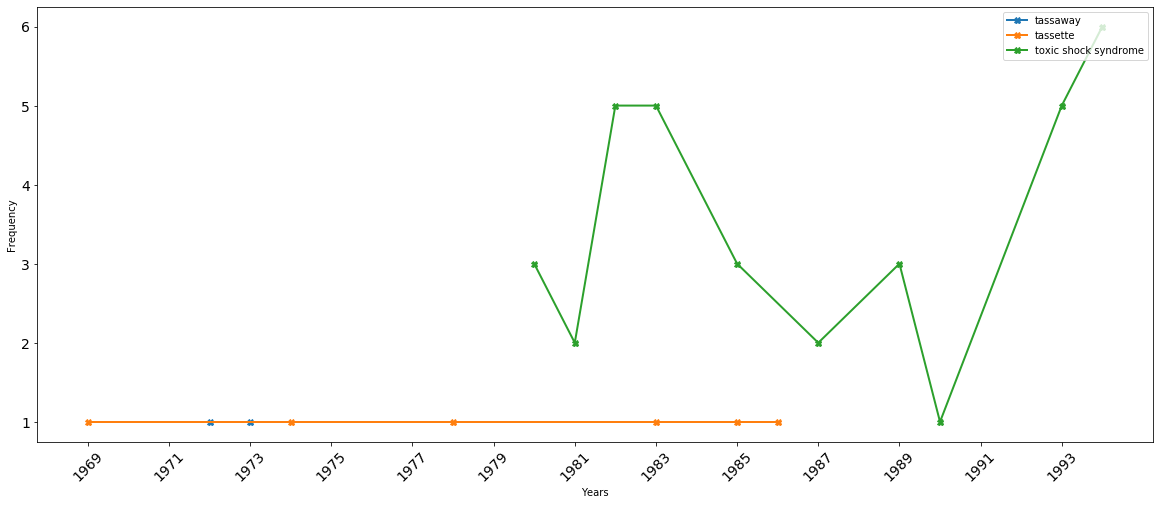

In [316]:
plot_freq_count(freq_count_lem, taxonomy_3)

#### Terms used (taxomomy_4): 'menopause', 'dysmenorrhea', 'amenorrhea', 'pms', 'pre menstrual syndrome', 'premenstrual syndrome'

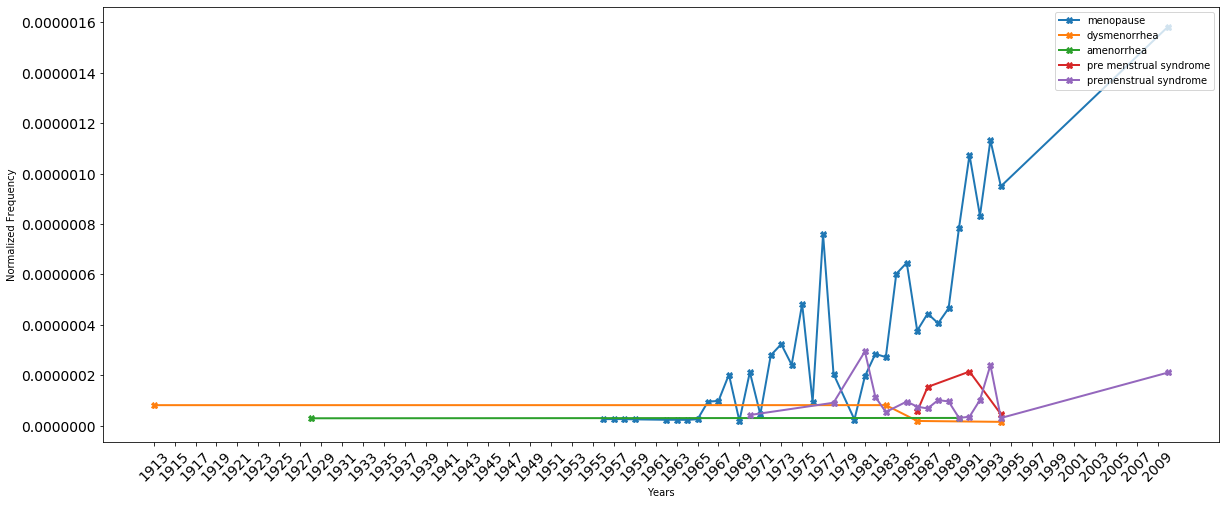

In [317]:
taxonomy_4 = ['menopause', 'dysmenorrhea', 'amenorrhea', 'pms', 'pre menstrual syndrome', 'premenstrual syndrome']
query_results=read_query_results('results_menstruation_total_20th')

freq_count_lem=freq_count(query_results)
normalize_freq(norm_publication, freq_count_lem, taxonomy_4)

#### Without normalising - Visualising the raw frequencies of taxonomy 4

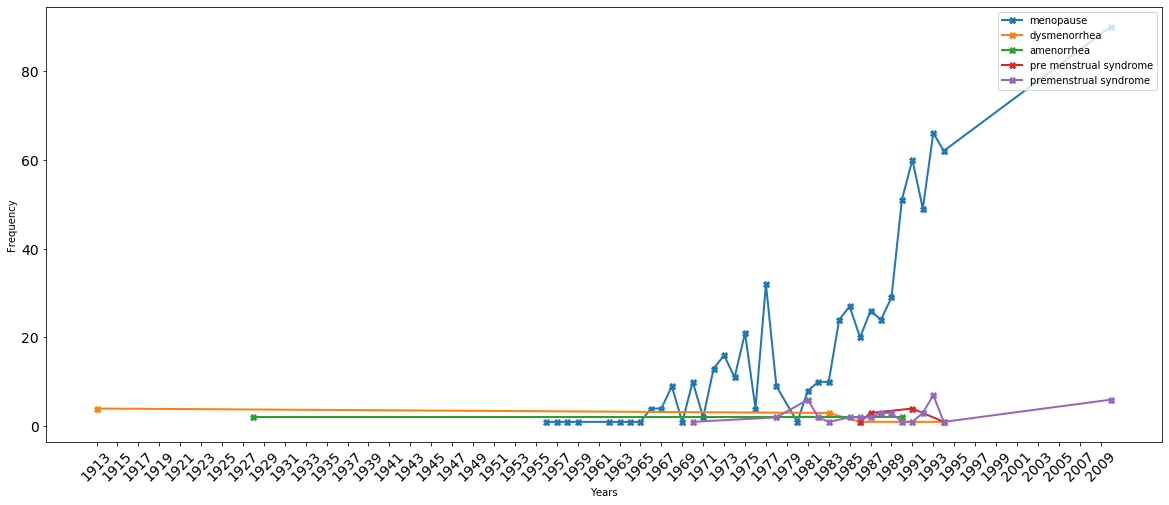

In [318]:
plot_freq_count(freq_count_lem, taxonomy_4)

#### Terms used (taxomomy_5): 'katharina dalton', 'playtex', 'rely', 'syngyna', 'bodyform', 'essity'

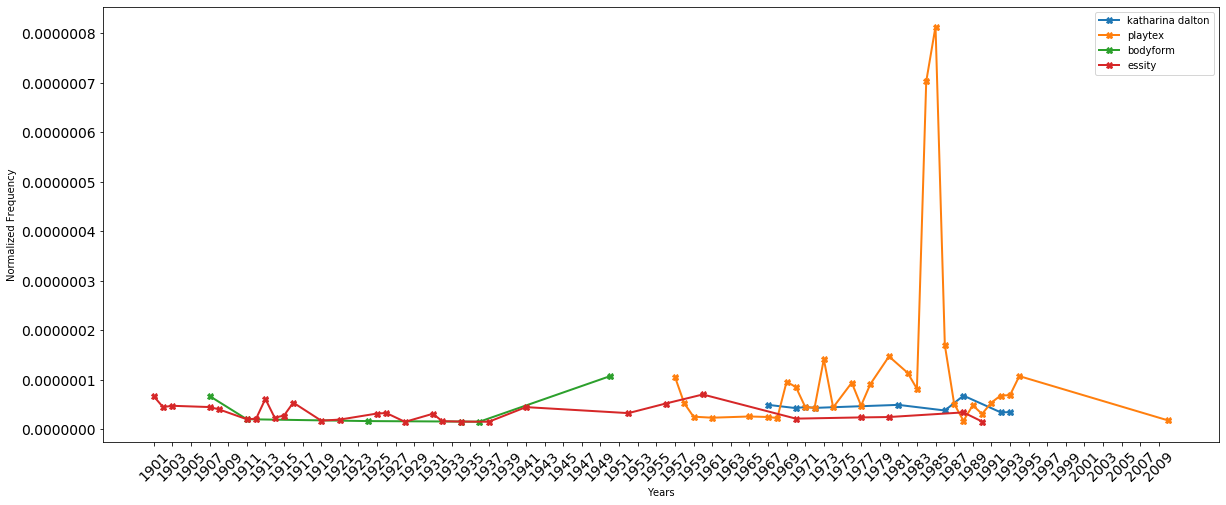

In [319]:
#taxonomy_5 = ['katharina dalton', 'playtex', 'rely', 'syngyna', 'bodyform', 'essity']
taxonomy_5 = ['katharina dalton', 'playtex', 'syngyna', 'bodyform', 'essity']
query_results=read_query_results('results_menstruation_total_20th')

freq_count_lem=freq_count(query_results)
normalize_freq(norm_publication, freq_count_lem, taxonomy_5)

#### Without normalising - Visualising the raw frequencies of taxonomy 5

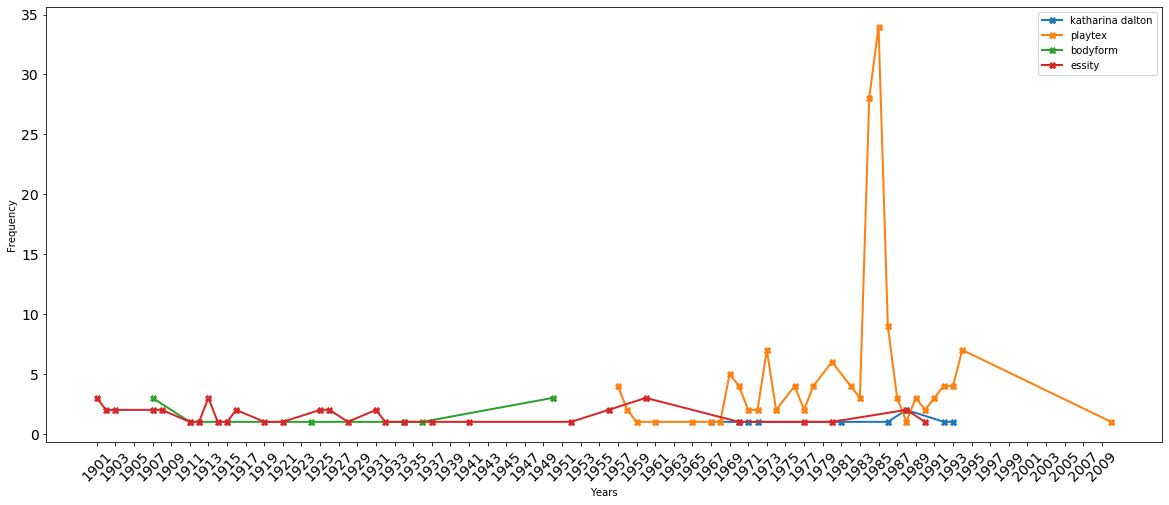

In [320]:
plot_freq_count(freq_count_lem, taxonomy_5)